
# Exploring FordGoBikes Dataset
## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wran">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
- <a href="#uni"><font color=1E3B84> Univariate Exploration </font></a><br>
- <a href="#bi"><font color=235F1F> Bivariate Exploration </font></a><br>
- <a href="#mul"><font color=84271E> Multivariate Exploration </font></a><br>

<a id='intro'></a>
<div class="alert alert-block alert-warning">
    1. Introduction
</div>

Dataset: FordGoBikes dataset, I choosed this dataset especially becase it has a lot of features as it has more than 180,000 records of bikes trips and their information, including stations coordinates, user types,	birth year,	gender, which can be easly interpret some insights.

In [53]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### General Properties
Reading the data and displaying a sample of it as well as some related-info.

In [54]:
%matplotlib inline
DF = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates=['start_time','end_time'])

In [55]:
DF[:5]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [56]:
DF.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<a id='wran'></a>
<div class="alert alert-block alert-warning">
    2. Data Wrangling
</div>

### Data Cleaning (Nulls - Duplications - Invalid Values)
#### Searching for Nulls

In [57]:
DF.isnull().sum().sort_values(ascending=False)[:8]

member_gender              8265
member_birth_year          8265
end_station_name            197
end_station_id              197
start_station_name          197
start_station_id            197
bike_share_for_all_trip       0
user_type                     0
dtype: int64

There are too many Nulls in the data, dropping 8265 + 197 of the data as about more than 5%, which will be too risky so instead, I will not remove the Nulls but i will replace some column values as [member_birth_year,member_gender] which have a lot of Nulls as it would be an issue in our needed insights

#### Replacing Null Values

Here we will replace null values of 'member_birth_year' and 'member_gender' columns

In [58]:
DF['member_birth_year'].isnull().sum(), DF['member_gender'].isnull().sum()

(8265, 8265)

We will replace the Null values in member_birth_year column with average birth year, also with member_gender we will replace them with 'Other' keyword, as there is a lot of records have much information so not be dropped.

In [59]:
DF["member_birth_year"].fillna(int(DF["member_birth_year"].mean()), inplace = True)
DF["member_gender"].fillna("Other", inplace = True)

In [60]:
DF['member_birth_year'].isnull().sum(), DF['member_gender'].isnull().sum()

(0, 0)

This repalcing will help us while exploratory data of columns

And that hepls also in removing duplicated data

#### Searching for Duplicated Values

Looking for duplicated rows in Data, let's count those values.

In [61]:
DF.duplicated(keep=False).sum()

0

#### Searching for Nulls again

In [62]:
DF.isnull().sum().sort_values(ascending=False)[:4]

end_station_name      197
end_station_id        197
start_station_name    197
start_station_id      197
dtype: int64

#### Dropping Nulls

In [63]:
DF.dropna(inplace=True)
len(DF), sum(DF.isnull().sum().values)
DF[:5]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984.0,Other,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


So we only dropped arround 200 rows which will not affect the whole dataset.

### Feature Engineering <br>
<li> Adding additional column for Age
<li> Additional column for Trip_distance
<li> Additional column for Day_time
<li> Additional column for Day of the week
<li> Additional column for biker speed

In [64]:
import datetime
# Calculating the Age
DF = DF.astype({"member_birth_year": int})
DF['Age'] = 2021 - DF['member_birth_year']
#Calculating the distance between the destinations
DF['Trip_distance'] = np.sqrt(((DF["start_station_latitude"] - DF["end_station_latitude"])**2) + ((DF["start_station_longitude"] - DF["end_station_longitude"])**2))
#Calculating the Day time(hour) of the trip
DF['Day_time'] = DF.start_time.dt.hour
#Calculating the Day of the week of the trip
DF["Day_week"] = DF['start_time'].dt.day_name()
#Calculating the speed of the bike driver (distance/time)
DF['Biker_speed'] = DF['Trip_distance']/DF['duration_sec']

In [65]:
DF[:5]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,Trip_distance,Day_time,Day_week,Biker_speed
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,37,0.005067,17,Thursday,9.709234e-08
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,1984,Other,No,37,0.015730,18,Thursday,3.699279e-07
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,49,0.027784,12,Thursday,4.491791e-07
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,32,0.002721,17,Thursday,7.456490e-08
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,47,0.025835,23,Thursday,1.629993e-05


Function for Sorting the DataFrame & Plotting Bar Chart

In [66]:
def Sorting(df,column,order):
    """ Description of function:  
    Parameters:
    df (Dataframe): Dataframe as input
    column (Str):   String representation of the column to sort with
    order (bool):   True for ascending, False for descending order
    
    Returns:
    Dataframe: Dataframe orderd by column values"""
    df = df.sort_values(by=[column], ascending=order)
    return df

def Plot(title, xlabel, ylabel, x, y, c, s=4):
    """ Description of function:  
    Parameters:
    title (Dataframe): Dataframe as input
    xlabel (Str):      String representation of the column to sort with
    ylabel (bool):     True for ascending, False for descending order
    x (list):          list or array of values
    y (list):          list or array of values
    c (Str):           String representation of color name
    s (int):           Integer value of figure hight
    
    Returns:
    Dataframe: Dataframe orderd by column values"""
    plt.figure(figsize=(16, s))
    plt.title(title, fontsize=16)
    plt.bar(x, y, color=c, alpha=0.7)
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.xticks(rotation=90, size=8)
    plt.show()

<a id='eda'></a>
<div class="alert alert-block alert-warning">
    3. Exploratory Data Analysis
</div>

### <a id='uni'></a>  <font color=1E3B84> Univariate Exploration </font>

### What is the range of Duration of Trips:

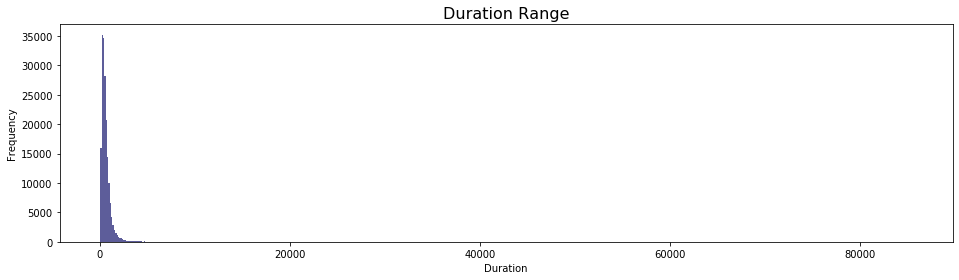

In [67]:
fig, axes = plt.subplots(1, 1,figsize=(16, 4))
DF['duration_sec'].plot(kind='hist',bins = 600, color='midnightblue', alpha=0.7)
plt.title('Duration Range', fontsize=16); plt.xlabel('Duration'); plt.ylabel('Frequency')
plt.show()

It seems like the histogram is left skewed, to the Zero lets explore more
   
   
   Counting **Less than 1000 values**

In [68]:
print('Duration Count: ', len(DF[DF['duration_sec'] < 1000]['duration_sec']))

Duration Count:  155617


- More than 3/4 of the data in duration_sec Column is less than 1000 Seconds.

### Which is the most date of birth usually uses the service:

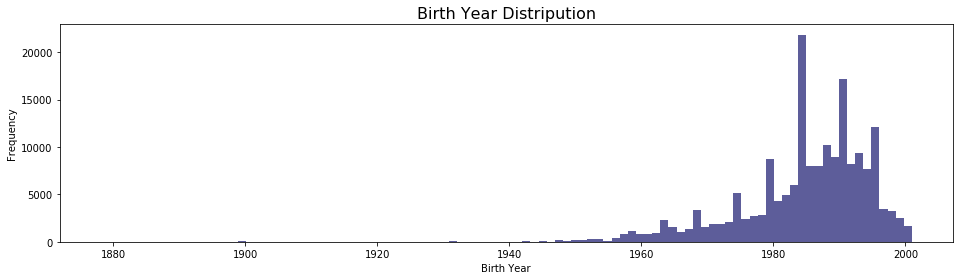

In [69]:
fig, axes = plt.subplots(1, 1,figsize=(16, 4))
DF['member_birth_year'].plot(kind='hist',bins = 100, color='midnightblue', alpha=0.7)
plt.title('Birth Year Distripution', fontsize=16); plt.xlabel('Birth Year'); plt.ylabel('Frequency')
plt.show()

So there are some outliers in member_birth_year column that will be handled later in age column.

### Which ages usually uses the service:

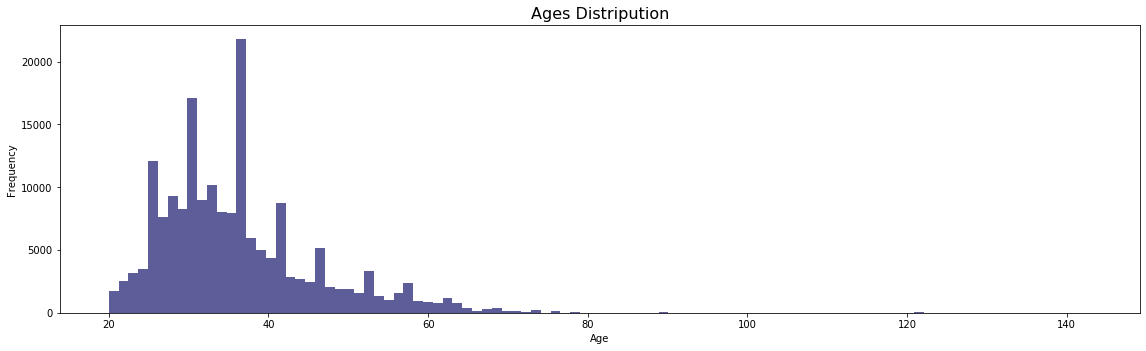

In [70]:
plt.hist(DF['Age'], bins = 100, color='midnightblue', alpha=0.7)
plt.title('Ages Distripution', fontsize=16); plt.xlabel('Age'); plt.ylabel('Frequency')
plt.subplots_adjust(left=1.5, bottom=1.5, right=4, top=2.5)
plt.show()

Highest segment of age uses the service is between 20 and 60, while a peak between ages 25 and 45.
Most of the data lies before age 80, thus dropping the outliers and values after 80 won't afffect the data

**Dropping DF['Age'] > 80 years (203 rows)**

In [71]:
DF.drop(DF[DF['Age'] > 80].index, inplace = True)

### Which is the busiest day:

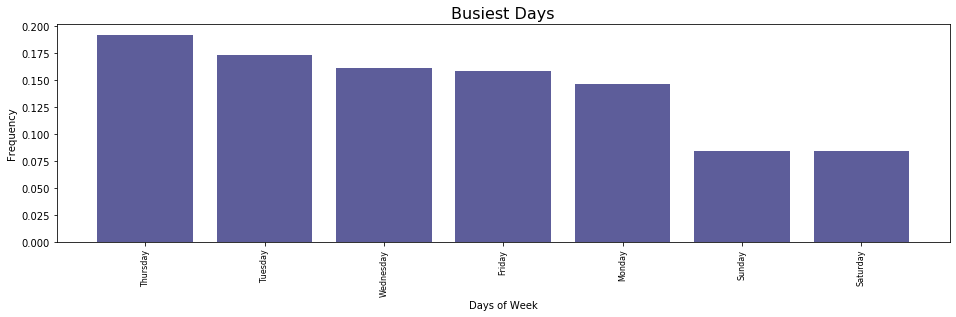

In [72]:
DW = DF['Day_week'].value_counts()/len(DF)
Plot('Busiest Days', 'Days of Week','Frequency', DW.index, DW.values, 'midnightblue', 4)

Thursday is the busiest while Saturday as a weekend is the less busy.

### Which is the busiest hours of the day:

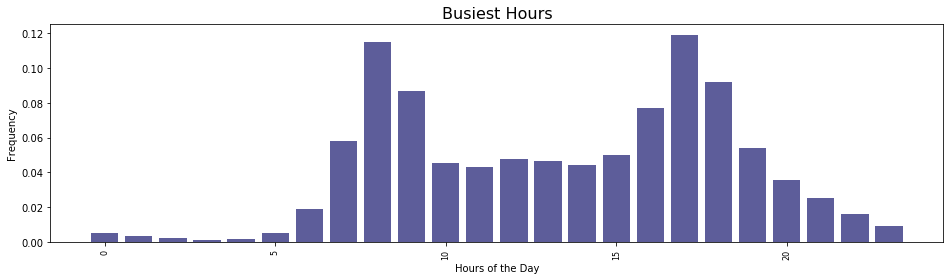

In [73]:
DT = DF['Day_time'].value_counts()/len(DF)
Plot('Busiest Hours', 'Hours of the Day', 'Frequency', DT.index, DT.values, 'midnightblue', 4)

Daily peak starts from 8 at morning and begin to decrease from afternoon, and then start to rise again from 3 and reaches the highst point at 5 PM.
It's look like we have two peaks at 8AM and 5PM which makes sense, Going to work vs. Leaving.

### Which Gender using the service the most:

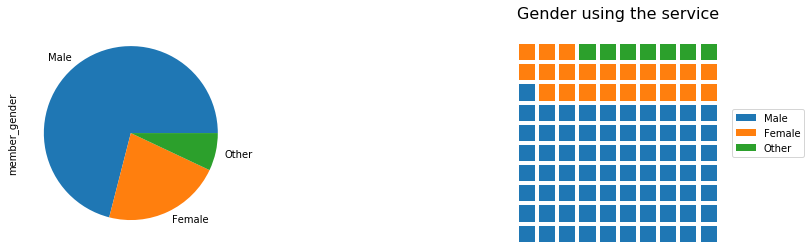

In [74]:
Gender_Count = round(DF['member_gender'].value_counts()/len(DF)*100)

fig, axes = plt.subplots(1, 2,figsize=(16, 4))
Gender_Count.plot(kind='pie', ax=axes[0])

prev_count = 0
for cat in range(Gender_Count.shape[0]):
    blocks = np.arange(prev_count, prev_count + Gender_Count[cat]); x = blocks % 10; y = blocks // 10 
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y); prev_count += Gender_Count[cat]
plt.title('Gender using the service', fontsize=16); plt.xlabel('Gender'); plt.ylabel('Frequency');
plt.legend(Gender_Count.index, bbox_to_anchor = (1, 0.5), loc = 6);
plt.axis('off');
plt.axis('square');
plt.show()

Male is a dominant in this job, while about 7% didn't specify.

### <a id='bi'></a> <a id='mul'></a> <font color=235F1F> Bivariate Exploration </font>

### What is Average Number of Trips per Day:

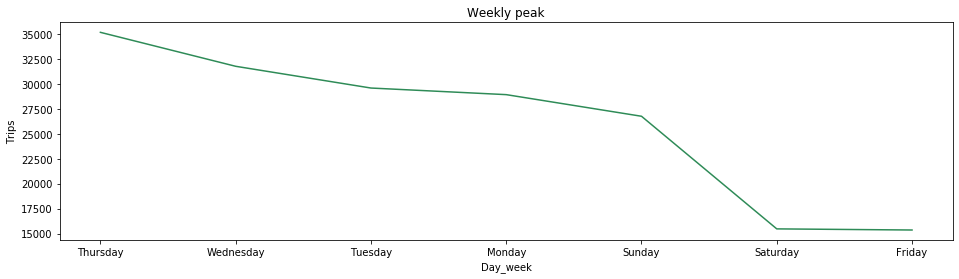

In [75]:
# ploting the column DF[Day_week] frequency
by_day = DF.groupby('Day_week').count()
fig, axes = plt.subplots(1, 1,figsize=(16, 4))
plt.xlabel('Day_week')
plt.ylabel('Trips')
plt.title('Weekly peak')
plt.plot(DF['Day_week'].unique().tolist(), DF['Day_week'].value_counts().values, c='seagreen');

Thursday and Wednesday were the highest peak of the trips, While Friday and Saturday were the lowest as they are the weekends in US.

### What is the Average Number of Trips per Age:

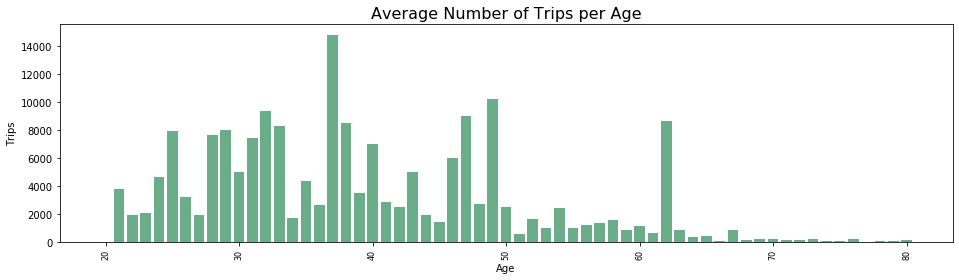

In [81]:
Plot('Average Number of Trips per Age', 'Age', 'Trips', DF['Age'].unique()[:80].tolist(), DF['Age'].value_counts(), 'seagreen');

Most of the users are between ages 20-50 with an average of 37 is where the most of the users arround.

###  Which Shares the bike the most:

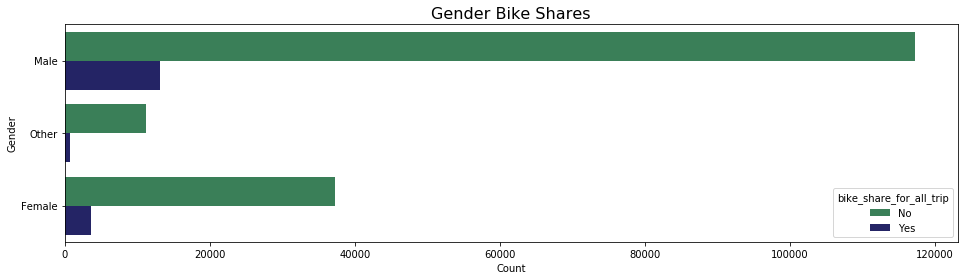

In [82]:
# Bike_share for gender
plt.figure(figsize=(16, 4))
sns.countplot(y=DF['member_gender'], hue = DF['bike_share_for_all_trip'], color='seagreen', palette=['seagreen','midnightblue']);
plt.title('Gender Bike Shares', fontsize=16); plt.xlabel('Count'); plt.ylabel('Gender');

Males portion in data is the highest while sharing is higher compared to males.

### Which age subscribe the service often:

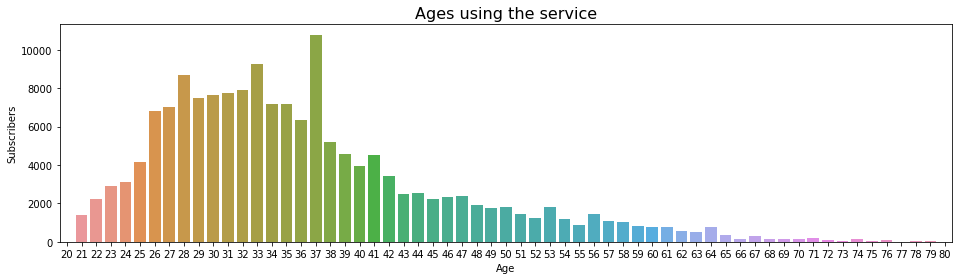

In [83]:
plt.figure(figsize=(16, 4))
subscriber = DF[DF['user_type'] == 'Subscriber']
by_subscriber = subscriber.groupby('Age')[['user_type']].count()
sns.barplot(x=by_subscriber.index, y= by_subscriber["user_type"]);
plt.title('Ages using the service', fontsize=16); plt.xlabel('Age'); plt.ylabel('Subscribers');

Most subscribers lie between 26 to 37 years old.

### What is the Average Speed of each Gender:

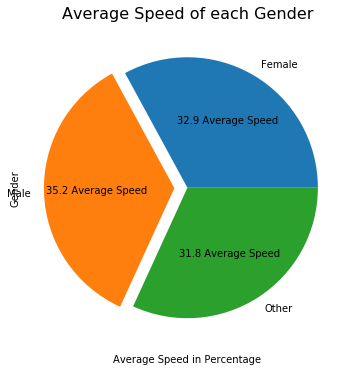

In [84]:
plt.figure(figsize=(16, 6))
xi = DF.groupby('member_gender').mean()['Biker_speed']*100000
explode = (0, 0.1, 0)
xi.plot.pie(explode = explode, autopct="%.1f Average Speed");
plt.title('Average Speed of each Gender', fontsize=16); plt.xlabel('Average Speed in Percentage'); plt.ylabel('Gender');

Males has the highest driving speed.

### <a id='mul'></a> <font color=84271E> Multivariate Exploration </font>

### What is the correlation between each of the columns:

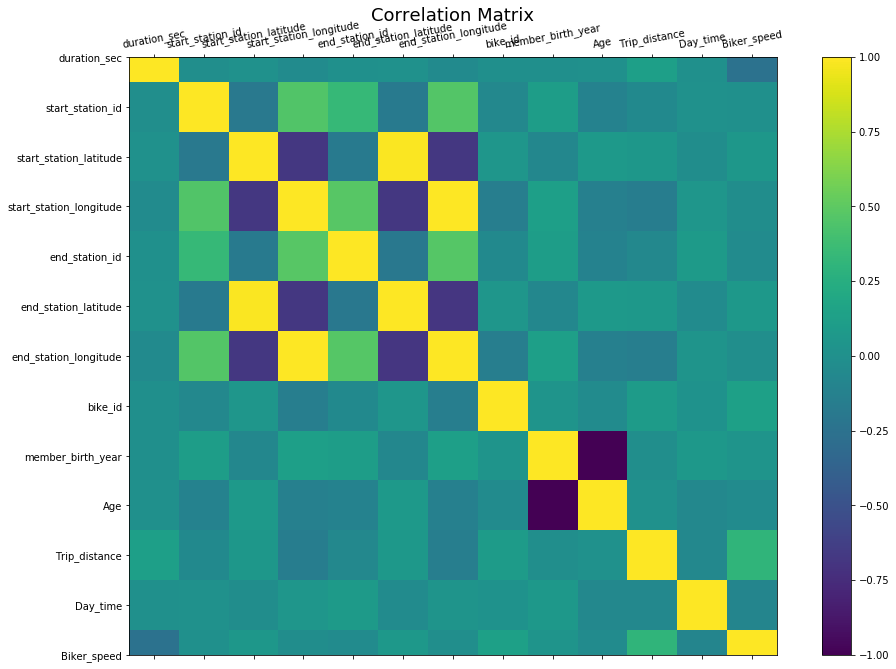

In [85]:
plt.figure(figsize=(16, 11))
plt.matshow(DF.corr(), fignum=0)
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(range(DF.select_dtypes(['number']).shape[1]), DF.select_dtypes(['number']).columns, rotation=10)
plt.yticks(range(DF.select_dtypes(['number']).shape[1]), DF.select_dtypes(['number']).columns)
plt.colorbar();

There is a correlation between the trip distance and biker speed, other than that it is normally to have a correlation between latidude and longitude.

### Which are the most used Stations:

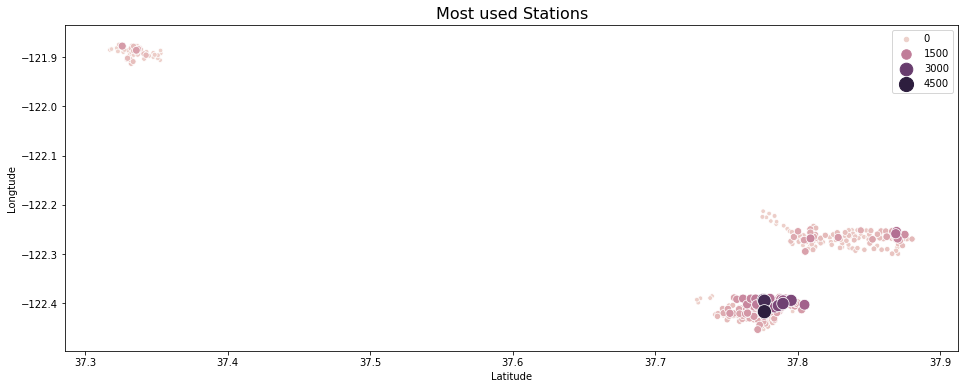

In [86]:
Data = DF.groupby(['start_station_latitude', 'start_station_longitude']).count().sort_values('Age')
x = np.array(Data.index.values.tolist())[:,0]
y = np.array(Data.index.values.tolist())[:,1]
h = np.array(Data.Age.values.tolist())
plt.figure(figsize=(16, 6))
sns.scatterplot(x=x, y=y, hue=h, size=h, sizes=(20, 200))
plt.title('Most used Stations', fontsize=16); plt.xlabel('Latitude'); plt.ylabel('Longtude');
plt.show()

There are three spots which rides happens frequently with most frequency in the bottom spot.

### How long Trips take each Day:

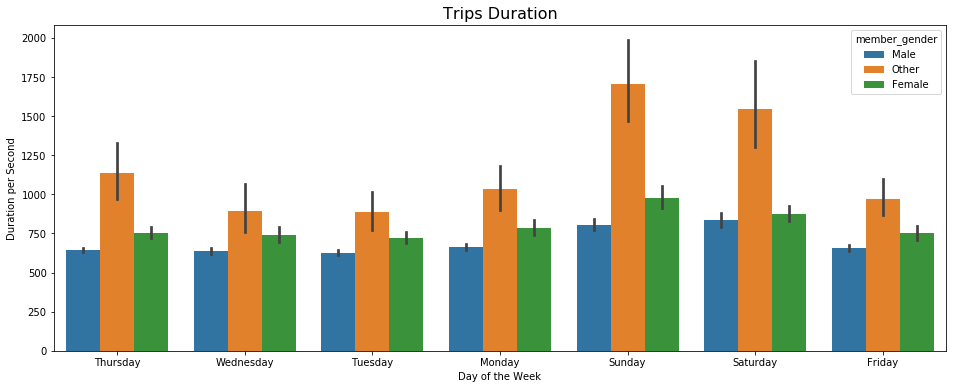

In [87]:
plt.figure(figsize=(16, 6))
sns.barplot(x = DF['Day_week'], y = DF['duration_sec'], hue=DF['member_gender']);
plt.title('Trips Duration', fontsize=16); plt.xlabel('Day of the Week'); plt.ylabel('Duration per Second');

Weekends is where the longest trips happens, while there is a little diffrence between durations of Males and females, females is tend for shorter trips.

### What is Number of Trips and Distance per Age:

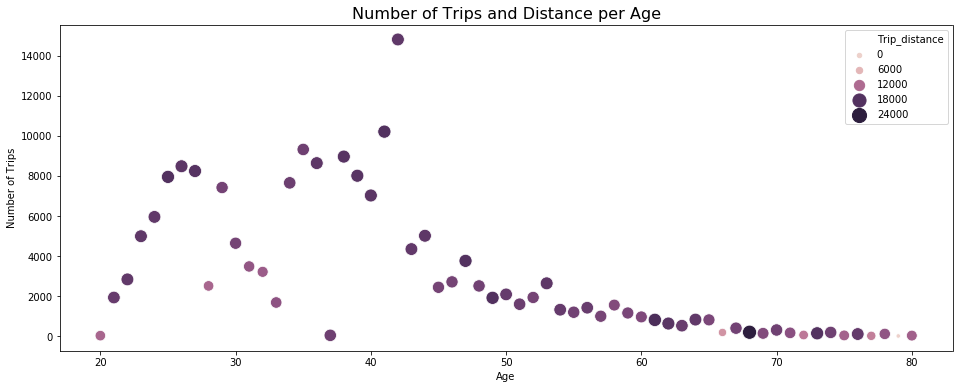

In [88]:
x = DF['Age'].value_counts().index
y = DF['Age'].value_counts()
h = (DF.groupby('Age')['Trip_distance'].mean()*1000000).astype(int)
plt.figure(figsize=(16, 6))
sns.scatterplot(x=x, y=y, hue=h, size=h, sizes=(20, 200))
plt.title('Number of Trips and Distance per Age', fontsize=16); plt.xlabel('Age'); plt.ylabel('Number of Trips');
plt.show()

Both Most Number of Trips and Trip Durations happens between ages 25 and 45, while after 45 number of trips tend to decrease as well as the trip distances.